<a href="https://colab.research.google.com/github/rimshaharmaen/EDA-Hotel-Booking-Analysis/blob/main/Rimsha_Harmaen_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

# **Explore and analyze the data to discover important factors that govern the bookings.**


In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#reading csv file
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Hotel Bookings.csv")

In [ ]:
df.shape

(119390, 32)

There are 32 columns in the data 

In [ ]:
df.columns #to get the columns label

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


INFERENCE:
*  we observe that columns like 'children', 'company', 'country' and 'agent' have null values.




**Now lets have a look into the unique values of columns**

In [4]:
df['hotel'].unique() #unique method is used to find the unique values present in a column label

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

**Check for Duplicate rows and drop it**

In [ ]:
df[df.duplicated()].shape

In [57]:
#from above cell we observe that there are 31994 duplicate rows so we will drop these rows 
df.drop_duplicates(inplace = True)
df.shape

(87396, 32)

After droping the duplicate rows we observe that there are 87396 rows 

**Now lets check if there are any missing values**

In [58]:
df.isnull().sum().sort_values(ascending = False)[:5] #checking for missing values

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

**Handle the missing values**

In [4]:
df[['company']] = df[['company']].fillna(0) #filling missing value with 0

In [5]:
df['country'].fillna('others', inplace = True) #filling missing value with others

In [6]:
df['children'].fillna(df['children'].mean(), inplace = True) #filling missing value with mean

In [7]:
df[['agent']] = df[['agent']].fillna(0) #filling missing value with 0

# **Which Room type is in Demand??**

In [35]:
df["assigned_room_type"].unique() #to have a look into unique values of room type

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
#creating a dataframe which stores the number of time a particular room type is preferred
room_type_demand_df=(df["assigned_room_type"].value_counts()).reset_index()
room_type_demand_df.rename(columns = {'index':'room_type','assigned_room_type':'count'}, inplace = True)
room_type_demand_df

,room_type,count
0,A,46313
1,D,22432
2,E,7195
3,F,3627
4,G,2498
5,C,2165
6,B,1820
7,H,706
8,I,357
9,K,276


Text(0, 0.5, 'Number of Bookings')

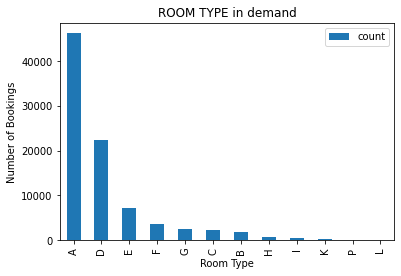

In [ ]:
#Using bar plot to represent room type in demand
room_type_demand_df.plot(x="room_type",y=["count"],kind="bar")
plt.title("ROOM TYPE in demand")
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")

**Inference:**
*   we  observe that Room type A is in demand followed by D and L and P are least preferred 
  


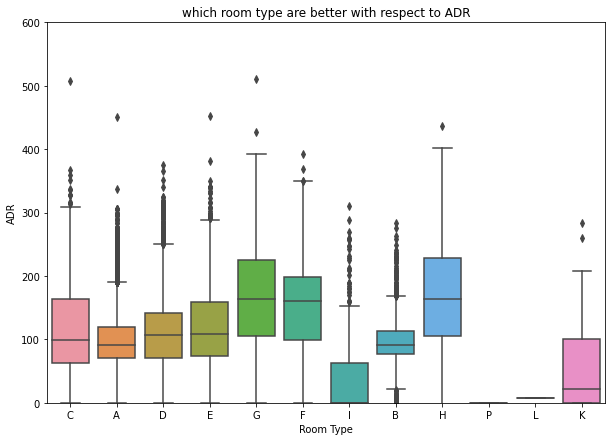

In [ ]:
#find which room type are better with respect to ADR
fig = plt.figure(figsize =(10,7))
sns.boxplot( x = df['assigned_room_type'], y = df['adr'])
plt.ylim(0, 600) #To set the range of Y-axis,we use ylim() method.
plt.title("which room type are better with respect to ADR")
plt.xlabel("Room Type")
plt.ylabel("ADR")
plt.show()

**Inference:**
we observe that Room type H,G,C are better with respect to adr

**Is there any variation from reerved and assigned room type if so then is there any impact in cancellation**

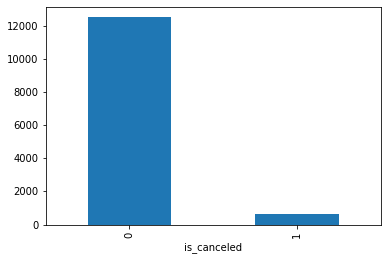

In [18]:
def check_for_variation(x):
  '''
  This function will take Dataframe df as input
  Here we check wether the room type is same as assigned room type
  if room type is variation in roomtype then we will return true
  else it will return false
  '''
  if x['reserved_room_type'] != x['assigned_room_type']:
    return True
  else:
    return False

df['same_room_not_alloted'] = df.apply(lambda x : check_for_variation(x), axis = 1)
roomtype_cancel_df=df.groupby('is_canceled')['same_room_not_alloted'].sum()
roomtype_cancel_df.plot(kind="bar")

**INFERENCE:**
*   We observe that there is if there is variation in the room type alloted is not the reason for cancellation




# **Customer Type**

In [20]:
df["customer_type"].unique()#finding unique types of customer

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

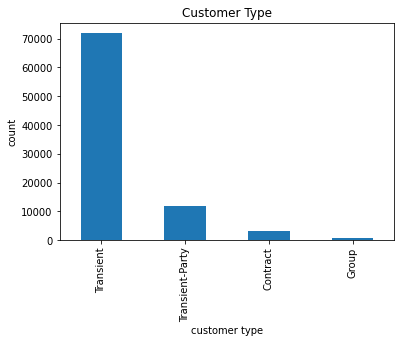

In [25]:
cux_type_df=df["customer_type"].value_counts()#finding count of each unique type of customer
cux_type_df.plot(kind="bar")#bar plot that depicts the customer type and there count
plt.title("Customer Type")
plt.xlabel("customer type")
plt.ylabel("count")
plt.show()

**INFERENCE**

*   We observe that there are 4 types of customers
*   Out of which transient( a customer who is temporarily traveling) type are more 



# Market Segment

In [26]:
df["market_segment"].unique()#finding types of market segement

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

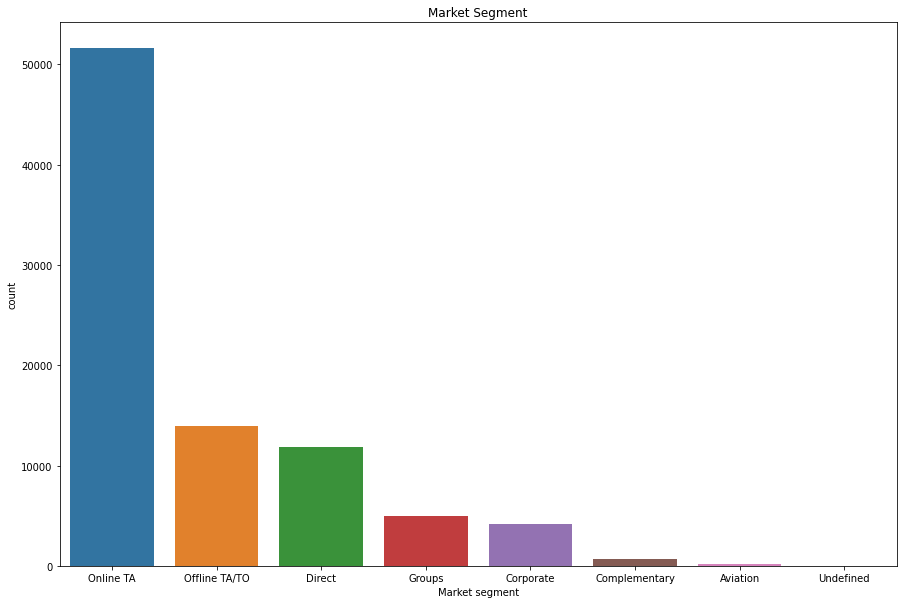

In [97]:
cux_market_segment_df=df["market_segment"].value_counts()
cux_market_segment_df=cux_market_segment_df.reset_index()
cux_market_segment_df.rename(columns={"index":"market_segment","market_segment":"count"},inplace=True)
sns.barplot(x="market_segment", y="count",data= cux_market_segment_df)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("Market Segment")
plt.xlabel("Market segment")
plt.ylabel("count")
plt.show()

# **Which agent made more booking**

In [37]:
df[['agent']] = df[[ 'agent']].astype('int64')#changing the data type of agent column to integer

In [38]:
#creating a dataframe which finds the number of booking by each agent 
agnt_vs_booking_df=df['agent'].value_counts()
agnt_vs_booking_df=agnt_vs_booking_df.reset_index()
agnt_vs_booking_df.rename(columns = {'index':'agent','agent':'Count'}, inplace = True)
agnt_vs_booking_df

,agent,Count
0,9,31961
1,0,16340
2,240,13922
3,1,7191
4,14,3640
...,...,...
329,280,1
330,285,1
331,289,1
332,265,1


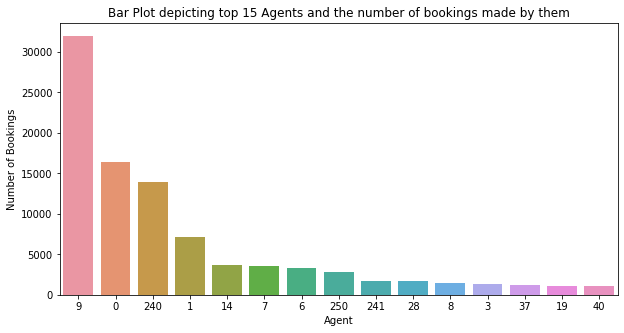

In [39]:
#agnt_vs_booking_df.plot(x="agent",y=["index"],kind="bar")
agnt_vs_booking_df.drop(agnt_vs_booking_df[agnt_vs_booking_df["Count"]==0.0].index,inplace=True)
agnt_vs_booking_df=agnt_vs_booking_df[:15]
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'Count',data = agnt_vs_booking_df, order = agnt_vs_booking_df.sort_values('Count', ascending = False).agent)
plt.title("Bar Plot depicting top 15 Agents and the number of bookings made by them")
plt.xlabel("Agent")
plt.ylabel("Number of Bookings")
plt.show()

In [74]:
p=(agnt_vs_booking_df["Count"]/df.shape[0])*100
agnt_vs_booking_df["Percentage"]=round(p,2)
agnt_vs_booking_df=agnt_vs_booking_df[:5]

<ipython-input-74-bf67fa3655d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agnt_vs_booking_df["Percentage"]=round(p,2)


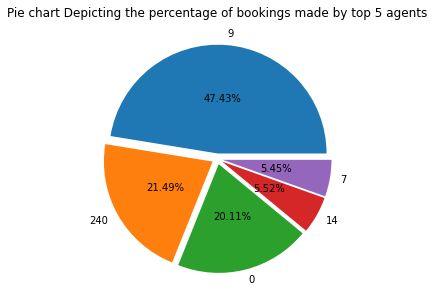

In [75]:
plt.figure(figsize = (10,5))
plt.pie(agnt_vs_booking_df["Percentage"],autopct="%.2f%%", labels = agnt_vs_booking_df["agent"], pctdistance=0.5, explode=[0.05]*5)
plt.title("Pie chart Depicting the percentage of bookings made by top 5 agents")
plt.show()

In [76]:

top_3_agents=agnt_vs_booking_df[:3]
top_3_agents

,agent,Count,Percentage
0,9,28759,32.91
1,240,13028,14.91
2,0,12193,13.95


In [77]:
agent_vs_month=(df
       .groupby(["agent", "arrival_date_month"])
       .size()
       .reset_index()
       .pivot(columns="agent", index="arrival_date_month")
       )
agent_vs_month.replace(np.NaN,0,inplace=True)
agent_vs_month

0                                               \
agent                  0      1     2     3     4     5      6      7     
arrival_date_month                                                        
April                985.0   53.0  19.0  34.0   0.0  11.0   50.0  295.0   
August              1037.0  193.0  10.0  15.0   0.0  57.0  123.0  275.0   
December             918.0   46.0   1.0  28.0   0.0  24.0   98.0  151.0   
February            1167.0   22.0   9.0   7.0   0.0  11.0   73.0  255.0   
January             1029.0   27.0   4.0   3.0   0.0   7.0   60.0  169.0   
July                 882.0  183.0  18.0  13.0   0.0  47.0  109.0  284.0   
June                 763.0   62.0   9.0  45.0   0.0  19.0  122.0  313.0   
March               1231.0   71.0   8.0  15.0   0.0   5.0   67.0  368.0   
May                 1125.0   59.0   2.0  54.0   0.0   8.0   64.0  376.0   
November             920.0   38.0   4.0   3.0   0.0   1.0  112.0  213.0   
October             1318.0  127.0  25.0  72.0   3.0   9.0  118.0  326.0   
September            818.0  351.0  20.0  74.0  15.0  17.0  121.0  275.0   

                                   ...                                      \
agent                 8       9    ...  495  497   502  508  509  510  526   
arrival_date_month                 ...                                       
April               123.0  3139.0  ...  0.0  0.0  14.0  0.0  0.0  0.0  3.0   
August              139.0  3984.0  ...  0.0  0.0   0.0  5.0  6.0  0.0  2.0   
December             91.0  1532.0  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
February             64.0  1948.0  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
January              52.0  1408.0  ...  0.0  0.0   0.0  0.0  0.0  1.0  0.0   
July                179.0  3521.0  ...  0.0  0.0   0.0  0.0  0.0  0.0  3.0   
June                126.0  2726.0  ...  6.0  1.0   0.0  0.0  0.0  0.0  1.0   
March               151.0  2607.0  ...  4.0  0.0   0.0  0.0  0.0  0.0  0.0   
May                 147.0  2956.0  ...  0.0  0.0   0.0  1.0  0.0  0.0  1.0   
November             88.0  1277.0  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
October             113.0  1873.0  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
September           110.0  1788.0  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0   

                                     
agent                527   531  535  
arrival_date_month                   
April               25.0   0.0  0.0  
August               0.0   1.0  0.0  
December             0.0   0.0  0.0  
February             0.0   0.0  0.0  
January              0.0   0.0  0.0  
July                 0.0  28.0  0.0  
June                 0.0  31.0  3.0  
March                0.0   0.0  0.0  
May                  0.0   0.0  0.0  
November             0.0   0.0  0.0  
October              0.0   0.0  0.0  
September            0.0   0.0  0.0  

[12 rows x 334 columns]

In [78]:
#creating a dataframe with months as index and agents as column labels
res_df=pd.crosstab(df.arrival_date_month,df.agent)
res_df

agent,0,1,2,3,4,5,6,7,8,9,...,495,497,502,508,509,510,526,527,531,535
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,985,53,19,34,0,11,50,295,123,3139,...,0,0,14,0,0,0,3,25,0,0
August,1037,193,10,15,0,57,123,275,139,3984,...,0,0,0,5,6,0,2,0,1,0
December,918,46,1,28,0,24,98,151,91,1532,...,0,0,0,0,0,0,0,0,0,0
February,1167,22,9,7,0,11,73,255,64,1948,...,0,0,0,0,0,0,0,0,0,0
January,1029,27,4,3,0,7,60,169,52,1408,...,0,0,0,0,0,1,0,0,0,0
July,882,183,18,13,0,47,109,284,179,3521,...,0,0,0,0,0,0,3,0,28,0
June,763,62,9,45,0,19,122,313,126,2726,...,6,1,0,0,0,0,1,0,31,3
March,1231,71,8,15,0,5,67,368,151,2607,...,4,0,0,0,0,0,0,0,0,0
May,1125,59,2,54,0,8,64,376,147,2956,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
#lets have a look on top 3 agents and their booking month wise
df["agent"].isin(top_3_agents.agent)
top_3_agents_list=list(top_3_agents.agent)
columnslist=list(res_df)
columnslist

In [80]:
for x in columnslist:
  if x not  in top_3_agents_list:
    res_df=res_df.drop([x],axis=1)

<Figure size 1440x720 with 0 Axes>

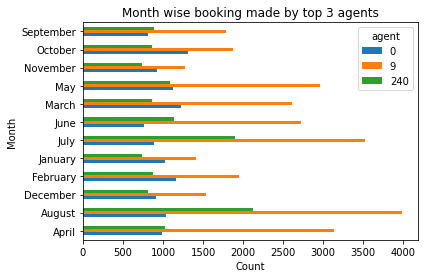

In [82]:
plt.figure(figsize = (20,10))
res_df.plot(kind="barh")
plt.title("Month wise booking made by top 3 agents")
plt.ylabel("Month")
plt.xlabel("Count")
plt.show()#month wise booking of top 3 agents

INFERENCE:


*   
Agent 9 made more bookings in the month of August followed by JUly
*  Agent 1 made more bookings in September month

*   
Agent 240 made more booking in August

*   We also observe that  the months August and July are most preferred 




# **Which Distribution channel is used most**

In [40]:
#creating a DataFrame with different types of distribution channel and its count
channel_vs_count_df=(df["distribution_channel"].value_counts()).reset_index().rename(columns={"index":"distribution_channel","distribution_channel":"Count"})
channel_vs_count_df

,distribution_channel,Count
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193
4,Undefined,5


In [41]:
#finding the percentage 
p=(channel_vs_count_df["Count"]/df.shape[0])*100
channel_vs_count_df["Percentage"]=round(p,2)

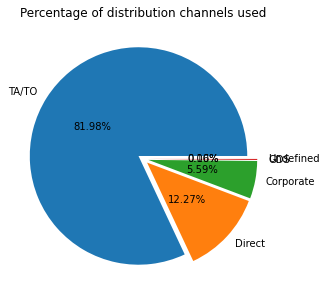

In [42]:
plt.figure(figsize = (10,5))
plt.pie(channel_vs_count_df["Percentage"],autopct="%.2f%%", labels = channel_vs_count_df["distribution_channel"], pctdistance=0.5, explode=[0.05]*5)
plt.title("Percentage of distribution channels used")
plt.show()

INFERENCE:

*   TA/TO is most preferred distribution channer




ADR and Distribution channel 

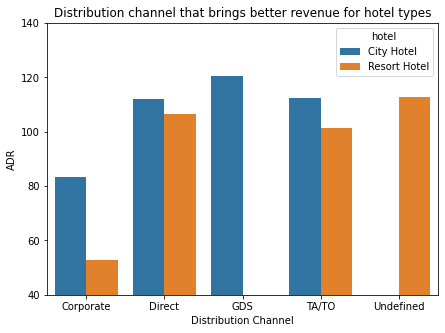

In [ ]:
#lets have a look onto which distribution channel has more revenue for each type of hotel
dc_vs_hotel = df.groupby(['distribution_channel', 'hotel'])
dch_df = pd.DataFrame(round((dc_vs_hotel['adr']).agg(np.mean),2))
dch_df=dch_df.reset_index().rename(columns = {'adr': 'average_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = dch_df['distribution_channel'], y = dch_df['average_adr'], hue = dch_df['hotel'])
plt.title("Distribution channel that brings better revenue for hotel types")
plt.ylabel("ADR")
plt.xlabel("Distribution Channel")
plt.ylim(40,140)
plt.show()

INFERENCE:

*   For City Hotel GDS generates more revenue 





# **people from which country are visiting more often**

top 3 country
in which month they are visitn often
which channel do they prefer
do they cancel the booking
which hotel type do they prefer

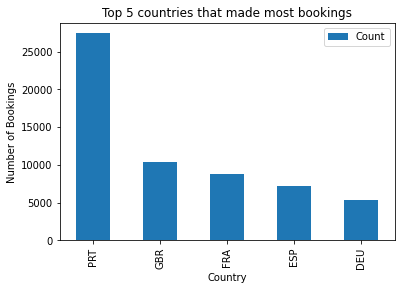

In [ ]:
num_visits_per_country=df["country"].value_counts().reset_index()
num_visits_per_country=num_visits_per_country[:5]#retrieving top 3 rows
num_visits_per_country.rename(columns={"index":"country","country":"Count"},inplace=True)#renaming columns
#print(num_visits_per_country)
num_visits_per_country.plot(kind="bar",x="country")#bar plot to depict the top 5 countries that made most bookings
plt.title("Top 5 countries that made most bookings")
plt.ylabel("Number of Bookings")
plt.xlabel("Country")
plt.show()

INFERENCE:

*   Portugal is the country with most visits




**ADR in Each Month**

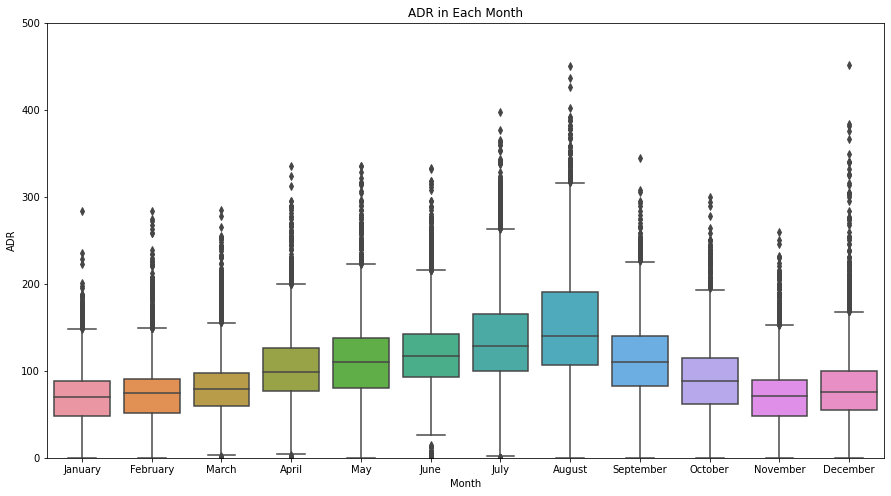

In [ ]:
#lets have a look onto ADR for each month
month_list = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=month_list,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df['arrival_date_month'],y = df['adr'])
plt.ylim(0,500)
plt.title("ADR in Each Month")
plt.ylabel("ADR")
plt.xlabel("Month")
plt.show()

**NUmber of repeated guests**

In [76]:
df[df["is_repeated_guest"]==1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13937,Resort Hotel,0,6,2016,April,17,20,0,2,1,...,No Deposit,5.0,NaN,0,Transient,0.00,1,0,Check-Out,2016-04-22
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,...,No Deposit,156.0,NaN,0,Contract,90.95,0,0,Canceled,2015-01-01
14777,Resort Hotel,1,187,2015,August,32,4,0,5,2,...,No Deposit,240.0,NaN,0,Transient,66.00,0,2,Canceled,2015-01-29
14817,Resort Hotel,1,202,2015,September,36,1,2,8,2,...,No Deposit,156.0,NaN,0,Contract,55.68,0,1,Canceled,2015-02-11
14823,Resort Hotel,1,173,2015,August,34,16,2,5,2,...,No Deposit,250.0,NaN,0,Transient,130.90,0,0,Canceled,2015-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,No Deposit,262.0,NaN,0,Transient,0.00,0,0,Check-Out,2017-08-08
117841,City Hotel,0,7,2017,August,35,30,0,2,1,...,No Deposit,NaN,40.0,0,Transient,65.00,0,2,Check-Out,2017-09-01
117961,City Hotel,0,0,2017,August,32,12,0,1,2,...,No Deposit,14.0,NaN,0,Transient,240.00,0,2,Check-Out,2017-08-13
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2017-08-14


In [81]:

df_repeated_guests=df[df["is_repeated_guest"]==1]#creating df for repeated guests
#df_repeated_guests=df_repeated_guests[df_repeated_guests["is_canceled"]==0]
df_repeated_guests=df_repeated_guests.groupby("hotel").size()
df_repeated_guests

hotel
City Hotel      2032
Resort Hotel    1778
dtype: int64

In [82]:
df_total=df.groupby("hotel").size()#size of hotels which contain repeated and non repeated guests

              repeated_guest_count  Total_count  percentage
hotel                                                      
City Hotel                    2032        79330        2.56
Resort Hotel                  1778        40060        4.44


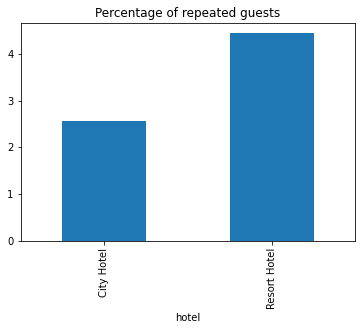

In [83]:
repeated_vs_total_for_each_hotel=pd.concat([df_repeated_guests,df_total], axis = 1)#creating a new df by concatinating abv created dfs
repeated_vs_total_for_each_hotel=repeated_vs_total_for_each_hotel.rename(columns={0:"repeated_guest_count",1:"Total_count"})
repeated_vs_total_for_each_hotel["percentage"]=round((repeated_vs_total_for_each_hotel['repeated_guest_count']/repeated_vs_total_for_each_hotel['Total_count'])*100,2)#finding percentage
repeated_vs_total_for_each_hotel["percentage"].plot(kind="bar")#using bar plot to depcit the percentage of repeated guests for each column
plt.title("Percentage of repeated guests")
plt.show()

**INFERENCE:**

*   we observe most number of repeated guests prefer Resort hotel




top 5 countrys from which there are repeated guests

  country  count
0     PRT   2873
1     GBR    107
2     ESP     89
3     FRA     76
4     ITA     37


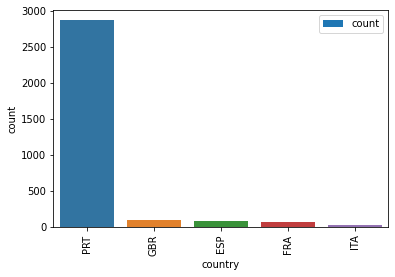

In [ ]:
rg_df=df[df["is_repeated_guest"]==1].value_counts().reset_index()
rg_country_df=(rg_df.groupby("country").size()).reset_index()
rg_country_df.rename(columns={0:"count"},inplace=True)
rg_country_df=rg_country_df.sort_values("count",ascending = False).reset_index()
rg_country_df.drop("index",axis=1,inplace=True)
rg_country_df=rg_country_df[:5]
rg_country_df.plot(kind="bar")
sns.barplot(x = rg_country_df["country"], y =rg_country_df["count"] )
print(rg_country_df)

# **Special Request**

In [50]:
df["total_of_special_requests"].unique() #unique number of special request

array([0, 1, 3, 2, 4, 5])

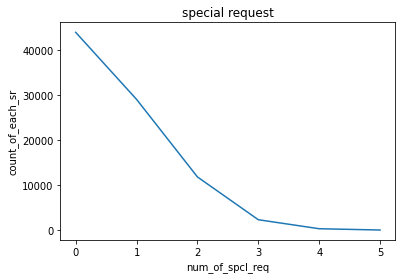

In [67]:
each_sr_count_df=(df["total_of_special_requests"].value_counts()).reset_index().rename(columns={"index":"num_of_spcl_req","total_of_special_requests":"count_of_each_sr"})
each_sr_count_df["count_of_each_sr"].plot()#plotting the dataframe which has the count of each number of special request
plt.title("special request")
plt.xlabel("num_of_spcl_req")#set the label for x axis
plt.ylabel("count_of_each_sr")#set label for y axis
plt.show()

**INFERENCE:**
*   We observe that most customers donot have any special request
*   The maximum number of special request opted is 5 where as very few customers has opted for this 



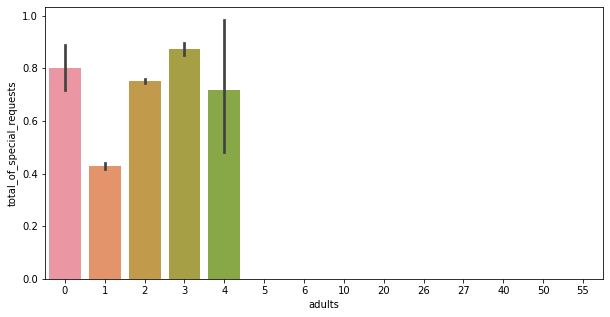

In [69]:
sns.barplot(x="adults", y="total_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(10,5)


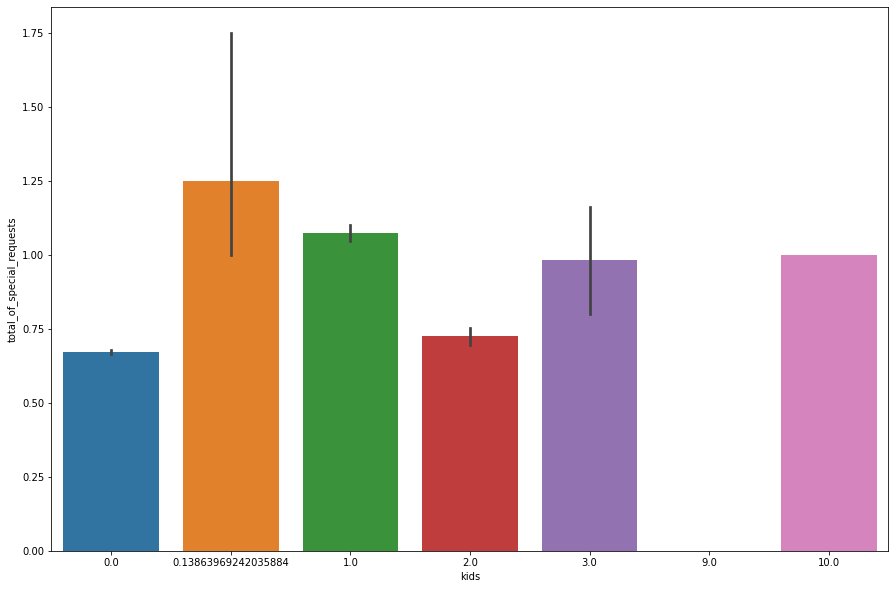

In [85]:
df['kids'] = df['children']+df['babies']
sns.barplot(x="kids", y="total_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(15,10)

In which year most number of bookings are done

In [28]:
yr_booking=df.groupby("arrival_date_year")
yr_booking=(yr_booking["hotel"].count()).reset_index()
yr_booking.set_index("arrival_date_year",inplace=True)
yr_booking.rename(columns={"hotel":"num_of_bookings"},inplace=True)
yr_booking

,num_of_bookings
arrival_date_year,
2015,21996
2016,56707
2017,40687


In [103]:
df["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [29]:
year_booking_not_cancelled_df=df[df["is_canceled"]==0]
year_booking_not_cancelled_df=year_booking_not_cancelled_df.groupby("arrival_date_year")
year_booking_not_cancelled_df=(year_booking_not_cancelled_df["hotel"].count()).reset_index()
year_booking_not_cancelled_df.set_index("arrival_date_year",inplace=True)
year_booking_not_cancelled_df.rename(columns={"hotel":"num_of_bkngs_not_cancelled"},inplace=True)
year_booking_not_cancelled_df

,num_of_bkngs_not_cancelled
arrival_date_year,
2015,13854
2016,36370
2017,24942


In [32]:
yr_vs_bkng_cancelled=pd.concat([yr_booking,year_booking_not_cancelled_df],axis=1)

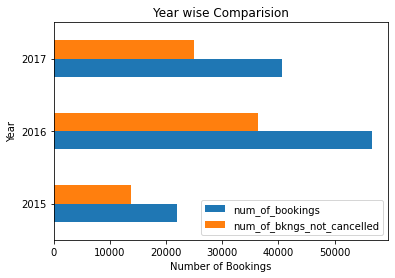

In [34]:
yr_vs_bkng_cancelled.plot(kind="barh")
plt.title("Year wise Comparision")
plt.xlabel("Number of Bookings")
plt.ylabel("Year")
plt.show()

**INFERENCE:**

*    We obserrve that in the year 2016 there are more number of bookings that are not cancelled


